In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype
from sklearn.dummy import DummyRegressor as DR
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
def remove_not_numbers(df):
    df_c = df.copy()
    for i in df_c.columns:
        if is_numeric_dtype(df_c[i]) == False or str(df_c[i].dtype) == 'boolean':
            df_c = df_c.drop([i], axis=1)
        else:
            continue
    return df_c

In [3]:
df = pd.read_csv('Final Data.csv', index_col='Unnamed: 0')
df = df.convert_dtypes()
df = remove_not_numbers(df)
df

,latitude,wind_speed,wind_degree,pressure,precip,humidity,cloudcover,uv_index,visibility,temperature,feelslike
7,84.94,14,163,1022,0.0,80,5,1,10,0,-4
8,84.22,14,163,1022,0.0,80,5,1,10,0,-4
9,83.49,14,163,1022,0.0,80,5,1,10,0,-4
10,82.77,14,163,1022,0.0,80,5,1,10,0,-4
11,82.05,28,109,1013,0.0,80,37,1,10,5,1
...,...,...,...,...,...,...,...,...,...,...,...
224,-71.9,30,121,1002,0.0,60,46,1,10,-23,-36
225,-72.6,30,121,1002,0.0,60,46,1,10,-23,-36
226,-73.3,30,121,1002,0.0,60,46,1,10,-23,-36
227,-74.1,30,121,1002,0.0,60,46,1,10,-23,-36


In [4]:
subset_seed = 97404
training_subset_size = 0.2

features = ['latitude', 'wind_speed', 'wind_degree', 'pressure', 'precip', 'humidity', 'cloudcover', 'uv_index', 'visibility']

indices = df.index
indices_treino, indices_teste = train_test_split(indices, test_size=training_subset_size, random_state=subset_seed)

df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]

x_treino = df_treino.reindex(features, axis=1).values
y_treino_temperature = df_treino.reindex(['temperature'], axis=1).values
y_treino_feelslike = df_treino.reindex(['feelslike'], axis=1).values
x_teste = df_teste.reindex(features, axis=1).values
y_teste_temperature = df_teste.reindex(['temperature'], axis=1).values
y_teste_feelslike = df_teste.reindex(['feelslike'], axis=1).values

In [5]:
baseline_model_temperature = DR()
baseline_model_feelslike = DR()

baseline_model_temperature.fit(x_treino, y_treino_temperature)
baseline_model_feelslike.fit(x_treino, y_treino_feelslike)

baseline_predicts_temperature = baseline_model_temperature.predict(x_teste)
baseline_predicts_feelslike = baseline_model_feelslike.predict(x_teste)

print(baseline_predicts_temperature)
print()
print(baseline_predicts_feelslike)

[19.9862069 19.9862069 19.9862069 19.9862069 19.9862069 19.9862069
 19.9862069 19.9862069 19.9862069 19.9862069 19.9862069 19.9862069
 19.9862069 19.9862069 19.9862069 19.9862069 19.9862069 19.9862069
 19.9862069 19.9862069 19.9862069 19.9862069 19.9862069 19.9862069
 19.9862069 19.9862069 19.9862069 19.9862069 19.9862069 19.9862069
 19.9862069 19.9862069 19.9862069 19.9862069 19.9862069 19.9862069
 19.9862069]

[19.06896552 19.06896552 19.06896552 19.06896552 19.06896552 19.06896552
 19.06896552 19.06896552 19.06896552 19.06896552 19.06896552 19.06896552
 19.06896552 19.06896552 19.06896552 19.06896552 19.06896552 19.06896552
 19.06896552 19.06896552 19.06896552 19.06896552 19.06896552 19.06896552
 19.06896552 19.06896552 19.06896552 19.06896552 19.06896552 19.06896552
 19.06896552 19.06896552 19.06896552 19.06896552 19.06896552 19.06896552
 19.06896552]


In [6]:
n=2
KN_model_temperature = KNR(n_neighbors=n)
KN_model_feelslike = KNR(n_neighbors=n)

KN_model_temperature.fit(x_treino, y_treino_temperature)
KN_model_feelslike.fit(x_treino, y_treino_feelslike)

KN_predicts_temperature = KN_model_temperature.predict(x_teste)
KN_predicts_feelslike = KN_model_feelslike.predict(x_teste)

y_verdadeiro_temperature = y_teste_temperature
y_previsao_temperature = KN_model_temperature.predict(x_teste)
RMSE_temperature = mean_squared_error(y_verdadeiro_temperature, y_previsao_temperature, squared=False)
print(f"O RMSE do modelo k-NN para temperatura foi de {RMSE_temperature} graus.")

y_verdadeiro_feelslike = y_teste_feelslike
y_previsao_feelslike = KN_model_feelslike.predict(x_teste)
RMSE_feelslike = mean_squared_error(y_verdadeiro_feelslike, y_previsao_feelslike, squared=False)
print(f"O RMSE do modelo k-NN para feelslike foi de {RMSE_feelslike} graus.")

O RMSE do modelo k-NN para temperatura foi de 2.4119634258353853 graus.
O RMSE do modelo k-NN para feelslike foi de 2.8640360861383543 graus.


In [7]:
print(KN_predicts_temperature.T, KN_predicts_feelslike.T)

[[9.5 24.0 5.0 23.0 20.0 24.0 28.0 24.0 38.0 28.0 23.0 4.5 23.5 20.0 23.5
  22.0 4.5 22.0 5.0 23.5 -23.0 22.0 23.5 38.0 -23.0 4.5 21.0 22.0 -23.0
  22.5 27.0 26.5 26.5 30.0 23.5 22.0 20.5]] [[8.0 23.0 1.0 25.5 20.0 25.5 27.0 24.5 38.0 27.0 23.0 -1.0 23.0 20.0
  24.5 23.0 -1.0 22.0 1.0 23.0 -36.0 22.0 24.5 38.0 -36.0 -1.0 21.0 22.0
  -36.0 23.5 28.0 28.5 28.5 29.0 23.0 23.5 21.5]]


In [8]:
def kn_plot(x_train, y_train, x_test, y_test, n=5):
    import matplotlib.pyplot as plt
    
    result_RMSE = []
    tests = [i for i in range(1, n)]
    
    for k in tests:
        model = KNR(n_neighbors=k)
        model.fit(x_train, y_train)
        predicts = model.predict(x_test)
        rmse = mean_squared_error(y_test, predicts, squared=False)
        result_RMSE.append(rmse)
    
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Result for RMSE')
    plt.plot(tests, result_RMSE)

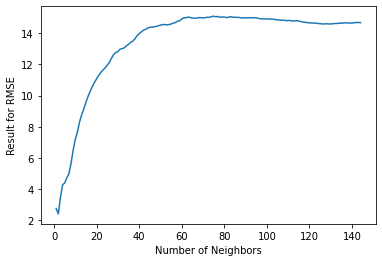

In [9]:
kn_plot(x_treino, y_treino_temperature, x_teste, y_teste_temperature, n=145)

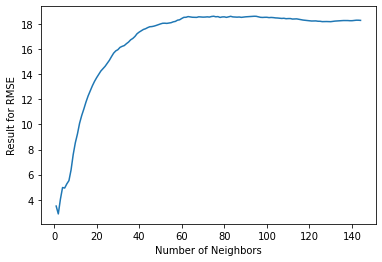

In [10]:
kn_plot(x_treino, y_treino_feelslike, x_teste, y_teste_feelslike, n=145)

In [11]:
def kn_3dplot(x_train, y_train, x_test, y_test, n=5):
    import matplotlib.pyplot as plt
    
    RMSEs = []
    tests_type = ['uniform', 'distance']
    tests_n = [i for i in range(1, n)]
    
    for type in tests_type:
        aux = []
        for k in tests_n:
            model = KNR(n_neighbors=k, weights=type)
            model.fit(x_train, y_train)
            predicts = model.predict(x_test)
            rmse = mean_squared_error(y_test, predicts, squared=False)
            aux.append(rmse)
        RMSEs.append(aux)
    
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Result for RMSE')
    
    print(tests_n)
    print()
    print(tests_type)
    print()
    print(RMSEs[0])
    print()
    print(RMSEs[1])
    
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    
    ax.plot(tests_n, tests_type, RMSEs)

[1, 2]

['uniform', 'distance']

[2.7558292027254874, 2.4119634258353853]

[2.7558292027254874, 2.378443314043746]


ValueError: input operand has more dimensions than allowed by the axis remapping

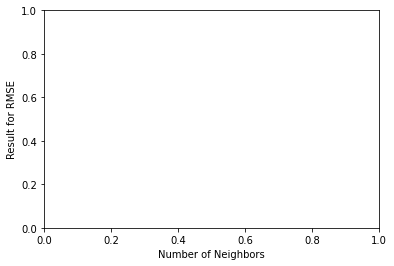

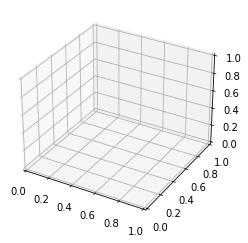

In [12]:
kn_3dplot(x_treino, y_treino_temperature, x_teste, y_teste_temperature, n=3)